# Data Analysis for Minable Set Creation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

http://archive.ics.uci.edu/ml/datasets/Air+Quality

# Import Data

In [2]:
ds = pd.read_csv('data/AirQualityUCI/train.csv')

In [3]:
ds.head()

,NO2(GT),PT08.S4(NO2),T,RH,AH,Day,Month,Year,Hour,Weekday
0,113.0,1692.0,13.6,48.9,0.7578,10,3,2004,18,6
1,92.0,1559.0,13.3,47.7,0.7255,10,3,2004,19,6
2,114.0,1555.0,11.9,54.0,0.7502,10,3,2004,20,6
3,122.0,1584.0,11.0,60.0,0.7867,10,3,2004,21,6
4,96.0,1393.0,11.2,59.2,0.7848,10,3,2004,23,6


# Working with Outliers

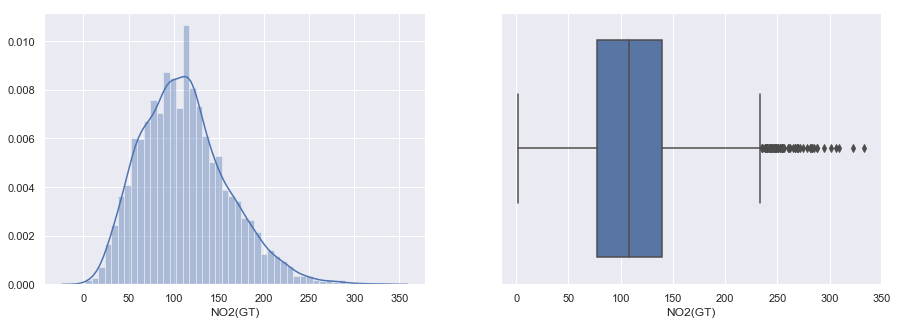

In [4]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(ds['NO2(GT)'], ax=ax[0])
a = sns.boxplot(x='NO2(GT)', data=ds, ax=ax[1])
# sns.despine(trim=True, left=True)

In [5]:
ds['NO2(GT)'].describe()

count    5187.000000
mean      112.006362
std        48.066156
min         2.000000
25%        77.000000
50%       108.000000
75%       140.000000
max       333.000000
Name: NO2(GT), dtype: float64

Outliers Limit  
(Q3 + (1.5 * IQR))

In [6]:
(140 + (1.5*(140-77)))

234.5

In [7]:
ds = ds[ds['NO2(GT)']<=234.5]

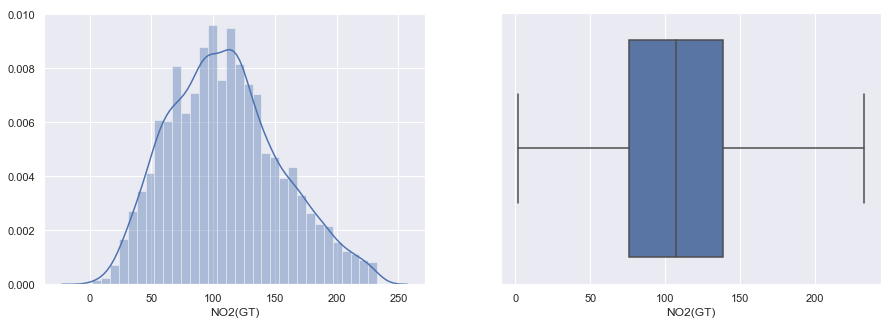

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(ds['NO2(GT)'], ax=ax[0])
sns.boxplot(x='NO2(GT)', data=ds, ax=ax[1])

# Correlation Analysis

Leave only main variables

In [9]:
main = ds.drop(ds.columns[[5,6,7,8,9]],axis=1)

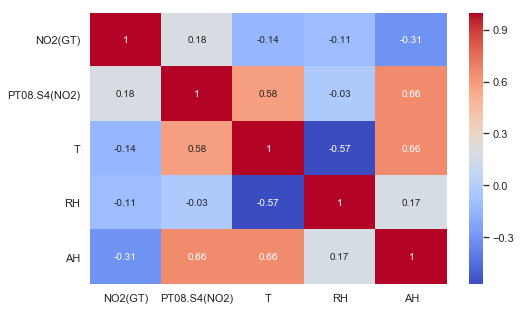

In [10]:
tc = main.corr()
plt.figure(figsize=(8,5))
sns.heatmap(tc,annot=True, cmap='coolwarm')

# Pairplot Analysis

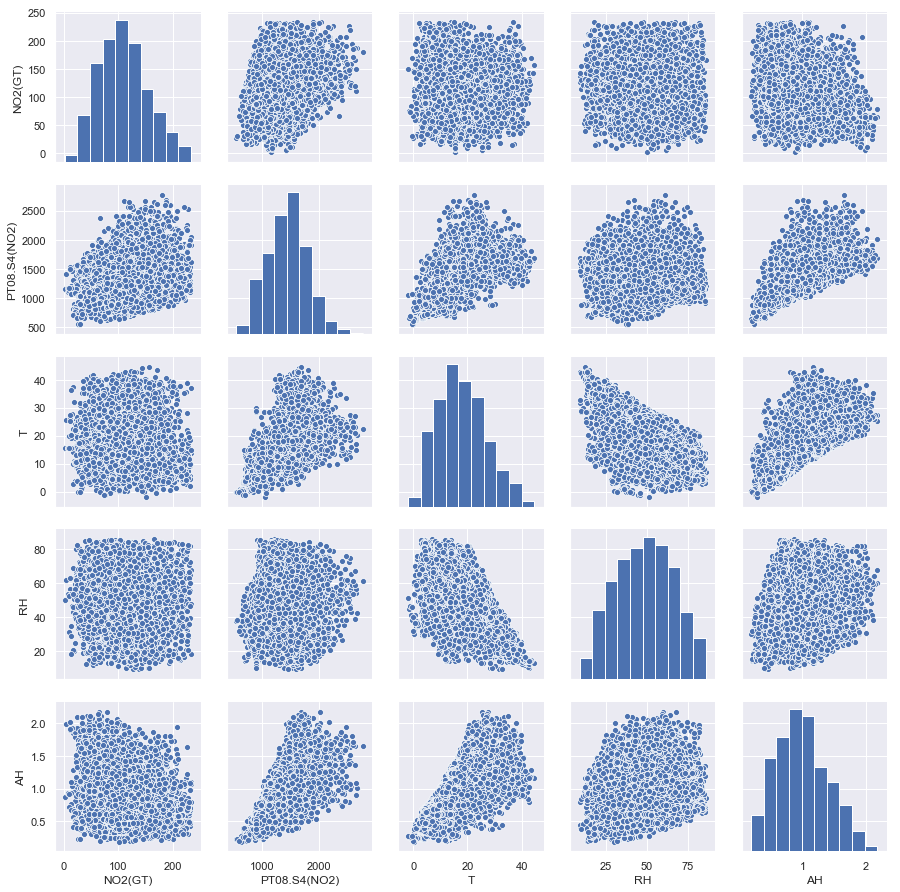

In [11]:
sns.pairplot(main)

## Main variables Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F3C4D10>,
      dtype=object)

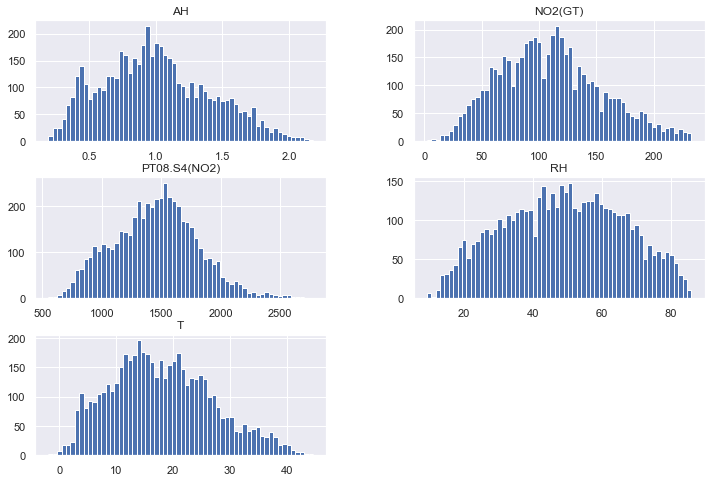

In [12]:
main.hist(bins=60,figsize=(12,8))

## Comparisson between NO2 and PT08.S4

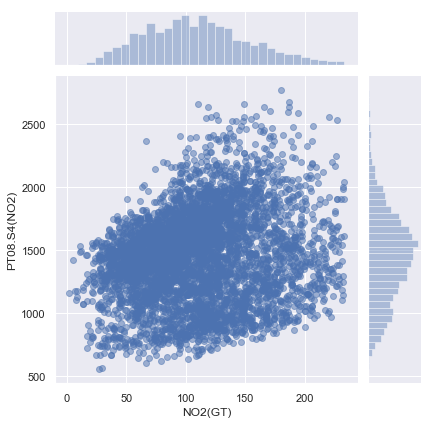

In [13]:
sns.jointplot(x='NO2(GT)',y='PT08.S4(NO2)',data=main,alpha=0.5)

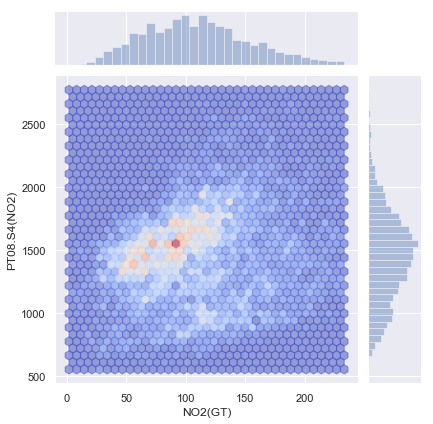

In [14]:
sns.jointplot(x='NO2(GT)',y='PT08.S4(NO2)',data=main,alpha=0.5, kind='hex',cmap='coolwarm')

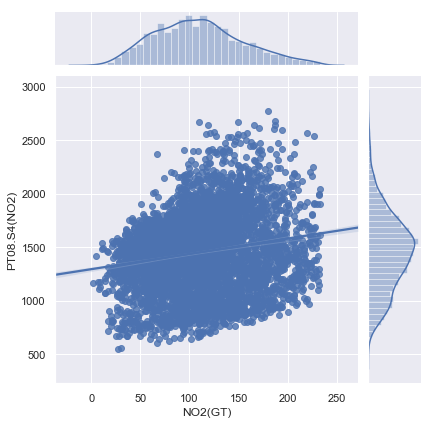

In [15]:
sns.jointplot(x='NO2(GT)',y='PT08.S4(NO2)',data=main, kind='reg')

## NO2 by Weekday

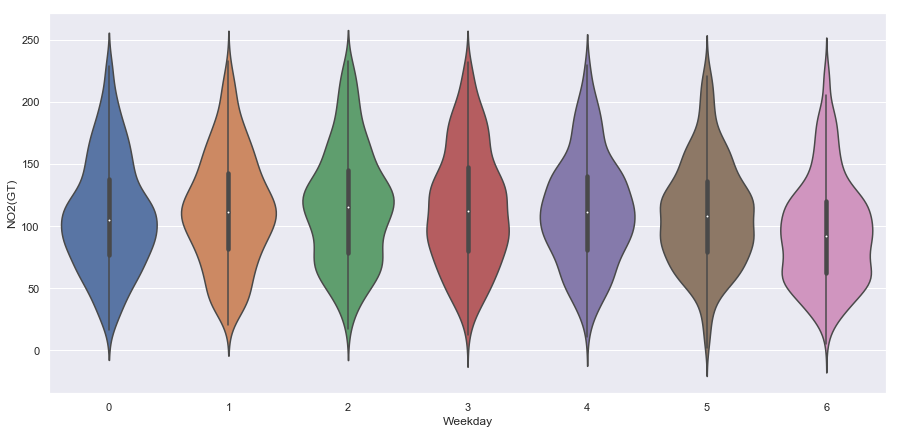

In [16]:
plt.figure(figsize=(15,7))
sns.violinplot(x='Weekday',y='NO2(GT)',data=ds)
# sns.swarmplot(x='Weekday',y='NO2(GT)',data=ds,color='black')

## NO2 by Weekday and Hour

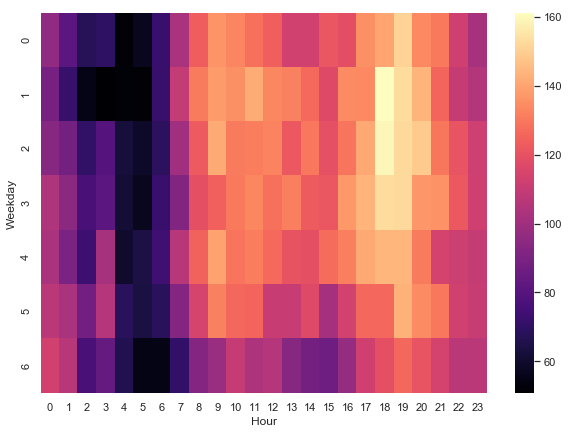

In [17]:
fp = ds.pivot_table(index='Weekday',columns='Hour',values='NO2(GT)')
plt.figure(figsize=(10,7))
sns.heatmap(fp,cmap='magma')

## PT08.S4 by Weekday and Hour

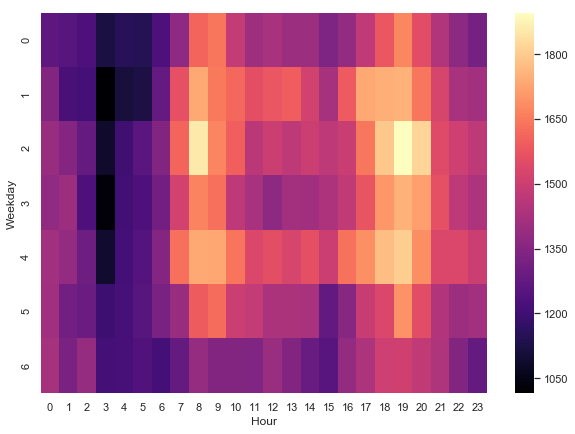

In [18]:
fp = ds.pivot_table(index='Weekday',columns='Hour',values='PT08.S4(NO2)')
plt.figure(figsize=(10,7))
sns.heatmap(fp,cmap='magma')

# Map by Quantity

## NO2 by Weekday and Hour

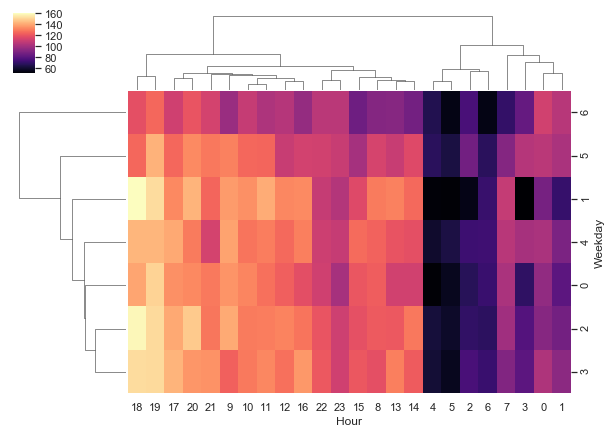

In [19]:
fp = ds.pivot_table(index='Weekday',columns='Hour',values='NO2(GT)')
sns.clustermap(fp,cmap='magma',figsize=(10,7))

## PT08.S4 by Weekday and Hour

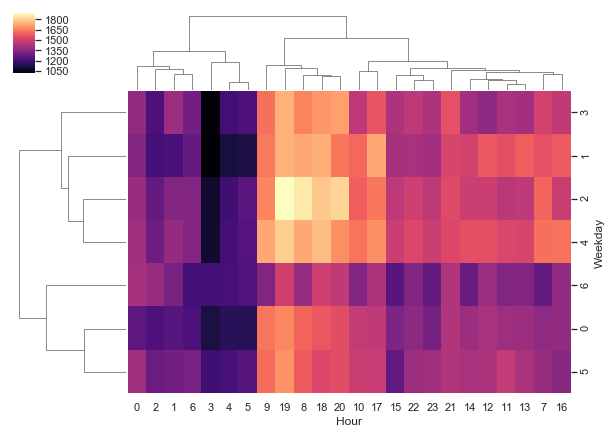

In [20]:
fp = ds.pivot_table(index='Weekday',columns='Hour',values='PT08.S4(NO2)')
sns.clustermap(fp,cmap='magma',figsize=(10,7))

# Other Analysis

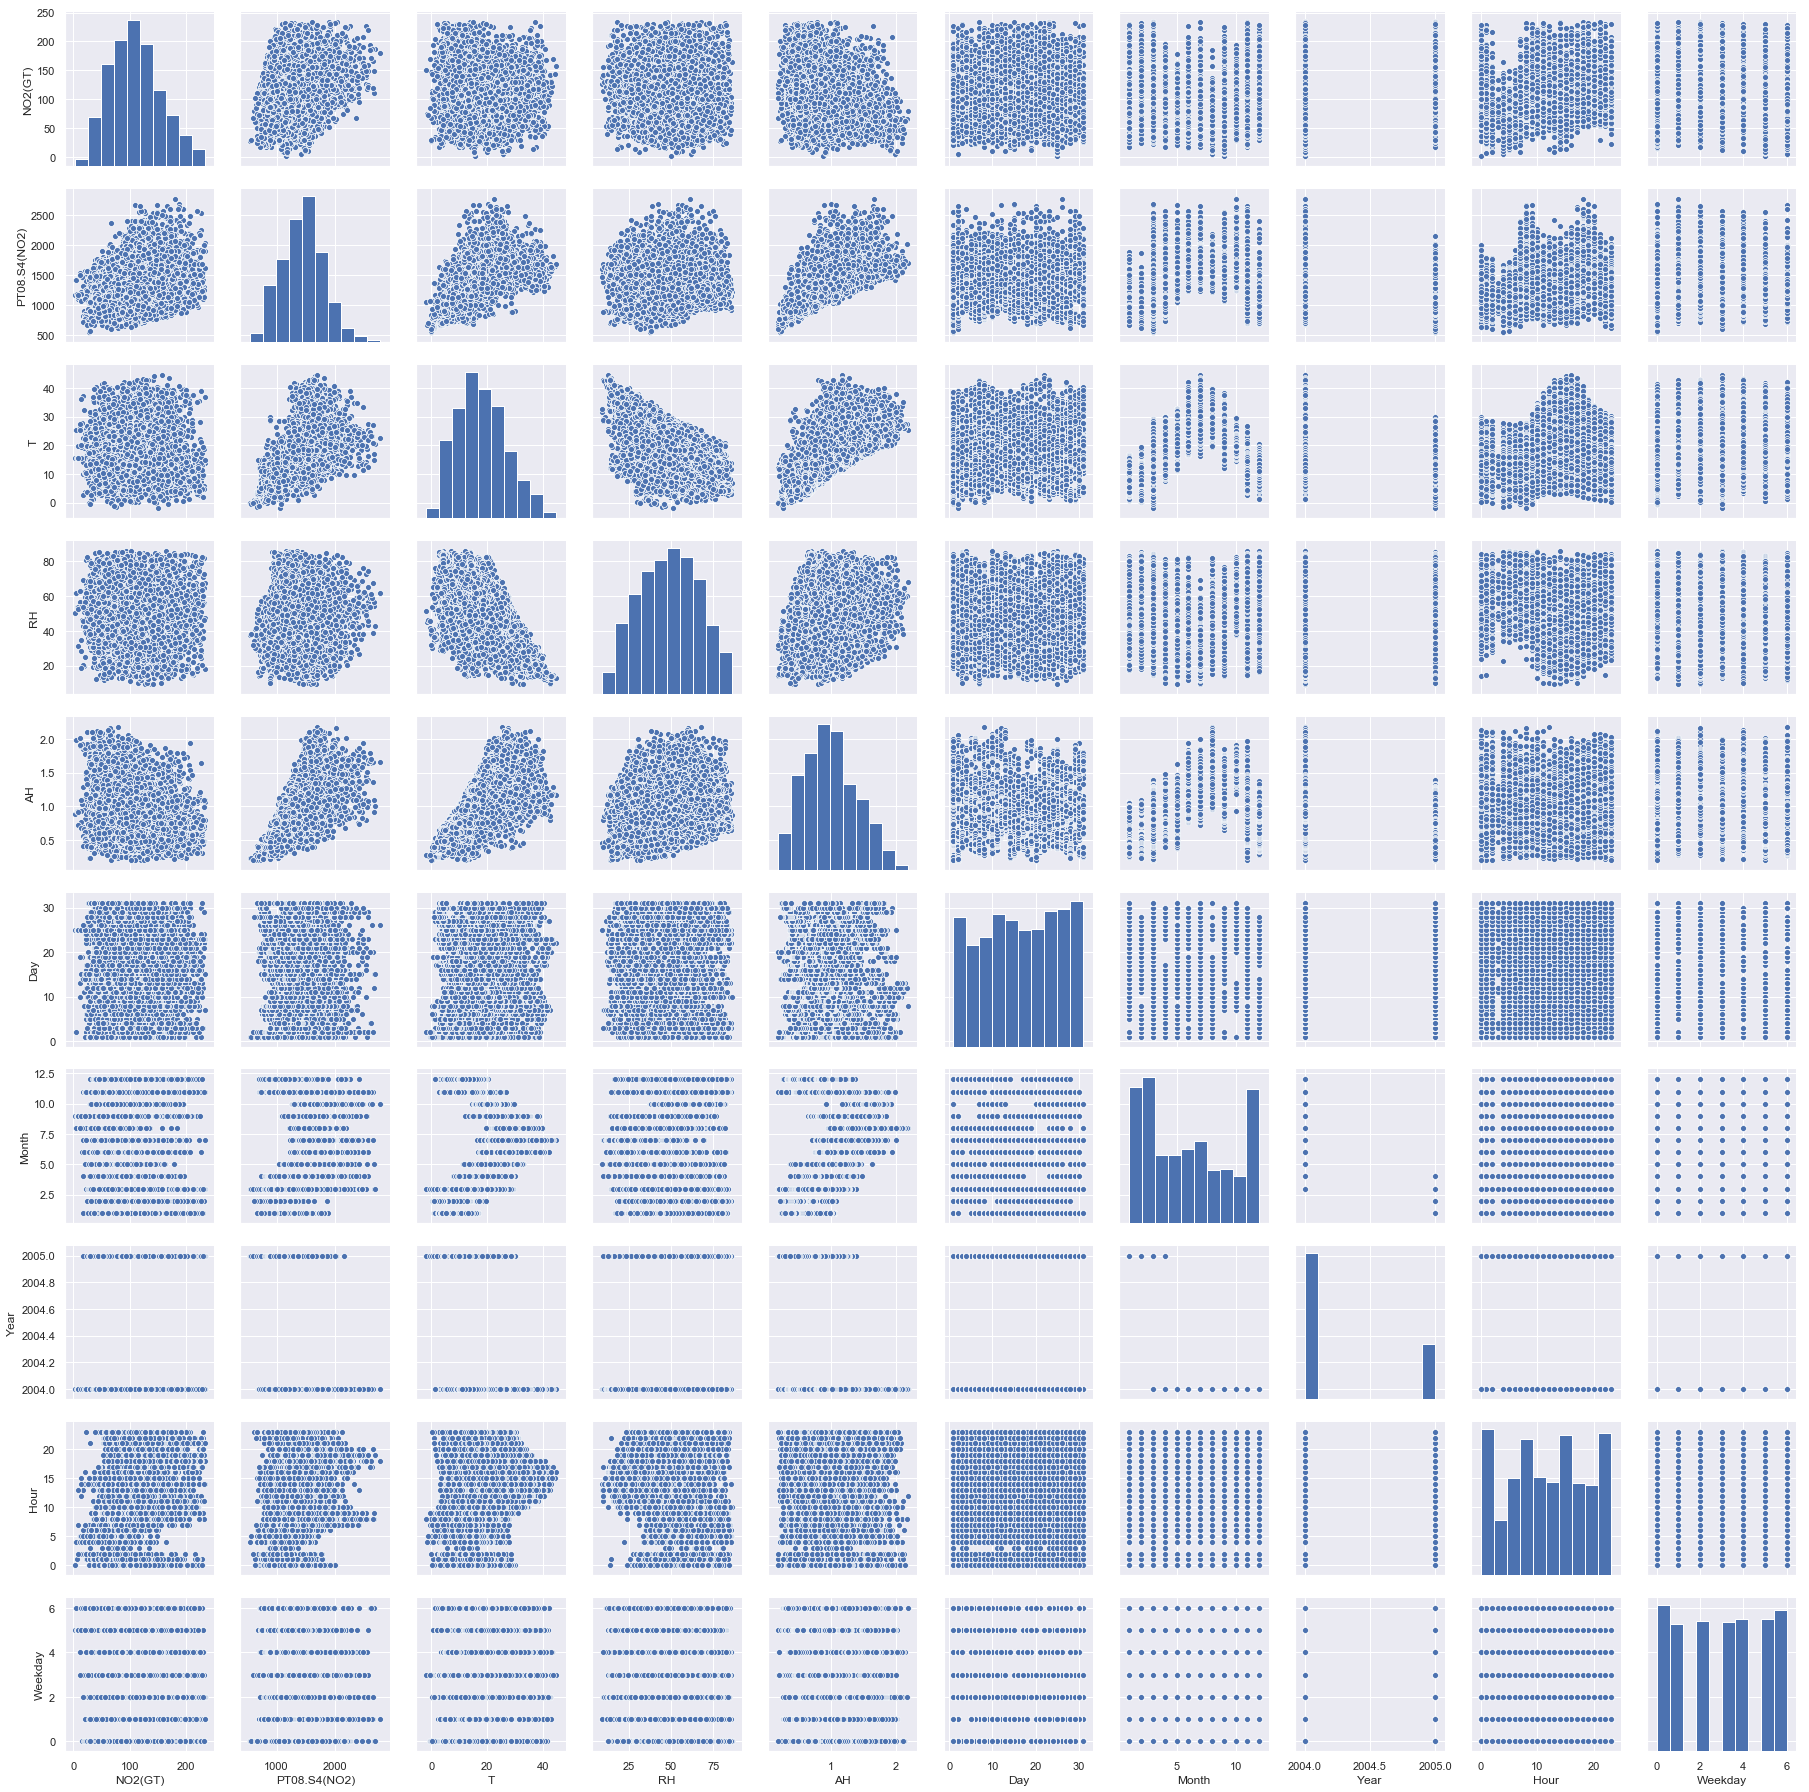

In [21]:
sns.pairplot(ds)

## NO2 and PT08.S4 by Month

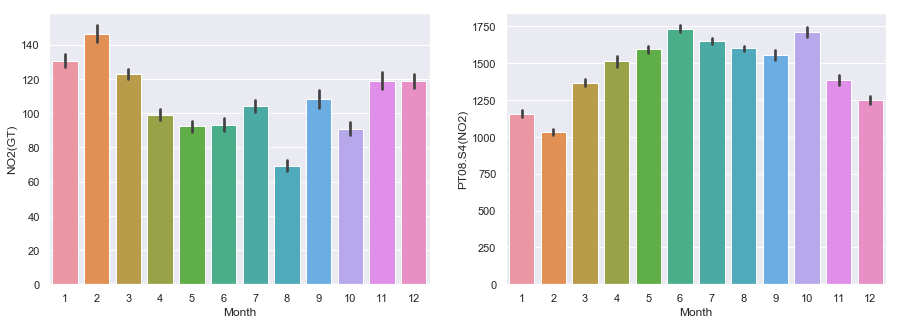

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x="Month", y="NO2(GT)", data=ds, ax=ax[0])
sns.barplot(x="Month", y="PT08.S4(NO2)", data=ds, ax=ax[1])

## NO2 by Day

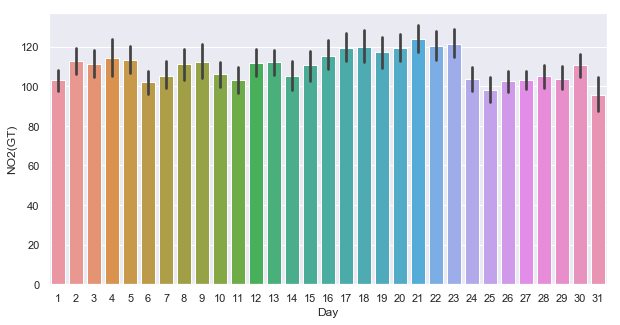

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x="Day", y="NO2(GT)", data=ds)

## PT08.S4 by Day

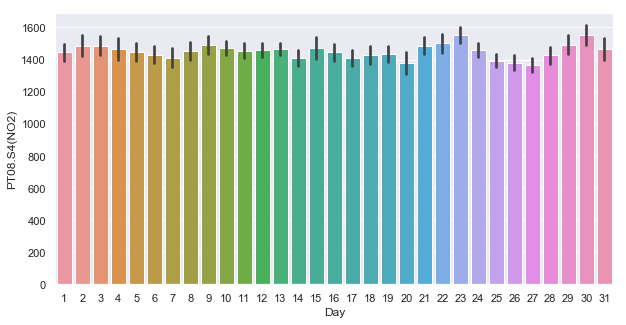

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x="Day", y="PT08.S4(NO2)", data=ds)

# Remove Year

In [26]:
ds.drop(ds.columns[7],axis=1, inplace=True)
ds.head()

,NO2(GT),PT08.S4(NO2),T,RH,AH,Day,Month,Hour,Weekday
0,113.0,1692.0,13.6,48.9,0.7578,10,3,18,6
1,92.0,1559.0,13.3,47.7,0.7255,10,3,19,6
2,114.0,1555.0,11.9,54.0,0.7502,10,3,20,6
3,122.0,1584.0,11.0,60.0,0.7867,10,3,21,6
4,96.0,1393.0,11.2,59.2,0.7848,10,3,23,6


# Create new dataset without outliers

In [27]:
ds.to_csv('data/AirQualityUCI/train_no_outliers.csv', index=None)